## Variable Labeling Ratio with blunt tip.

In [1]:
from pathlib import Path
import json
import sys
sys.path.append("../../../../")

import anamic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
from tqdm.auto import tqdm

data_dir = Path('/home/hadim/Drive/Data/Postdoc/Fake Microtubules/anamic/accuracy')

experiment_name = 'labeling_ratio_with_blunt_tip'
experiment_dir = data_dir / experiment_name

In [2]:
data = pd.read_csv(experiment_dir / "analysis.csv")

# Compute fitted tip error vs `true_end`.
data['error'] = np.sqrt(np.sum(data[['x', 'y']].values - data[['tip_end_x', 'tip_end_y']].values, axis=1)**2)

data.head()

,parameter,image_path,x,y,tip_start_x,tip_start_y,tip_end_x,tip_end_y,sigma,error
0,0.5,labeling_ratio-0.5/microtubule_0063.tif,6378.296170,6799.165250,4459.230769,4476.153846,6380.000000,6786.153846,70.143963,11.307574
1,0.5,labeling_ratio-0.5/microtubule_0041.tif,4480.961598,4355.331742,5170.000000,7370.000000,4459.230769,4433.846154,85.832902,56.783583
2,0.5,labeling_ratio-0.5/microtubule_0052.tif,4427.161307,4425.111436,6380.000000,6710.000000,4467.692308,4433.846154,66.769351,49.265719
3,0.5,labeling_ratio-0.5/microtubule_0092.tif,5263.344634,4451.773993,4450.769231,7370.000000,5280.000000,4459.230769,65.932227,24.112143
4,0.5,labeling_ratio-0.5/microtubule_0053.tif,4466.751021,4431.027706,6160.000000,6930.000000,4459.230769,4400.000000,56.044753,38.547958


In [7]:
data[x_feature] * 100

0      50.0
1      50.0
2      50.0
3      50.0
4      50.0
       ... 
995    30.0
996    30.0
997    30.0
998    30.0
999    30.0
Name: parameter, Length: 1000, dtype: float64

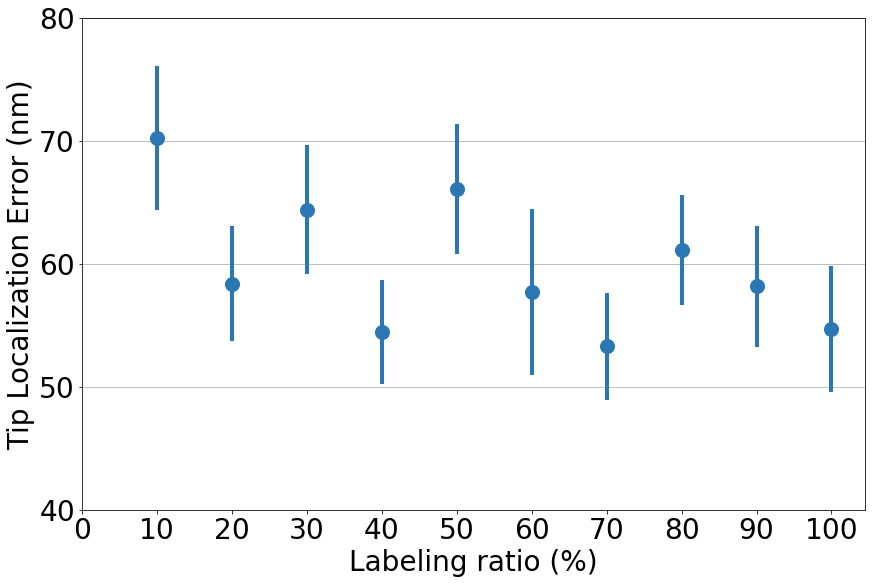

In [31]:
# Plot tip localization error.

x_feature = 'parameter'
y_feature = 'error'

font_size = 28
color = "#2a77b4"

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

x = data[x_feature]
y = data[y_feature]

#ax.scatter(x * 100, y, alpha=0.4, marker='x')

gb = data.groupby(x_feature)
average = gb.mean()

x_average = average.index * 100
y_average = average[y_feature]
ax.errorbar(x_average, y_average, yerr=gb.sem()[y_feature], fmt='o', color=color, elinewidth=4, markersize=14)

ax.set_xlabel("Labeling ratio (%)", fontsize=font_size)
ax.set_ylabel("Tip Localization Error (nm)", fontsize=font_size)

ax.set_xticks(np.arange(0, 110, 10))
ax.set_yticks(np.arange(0, 110, 10))

ax.set_ylim(40, 80)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
ax.yaxis.grid()
    
fig.savefig(experiment_dir / "error.png")

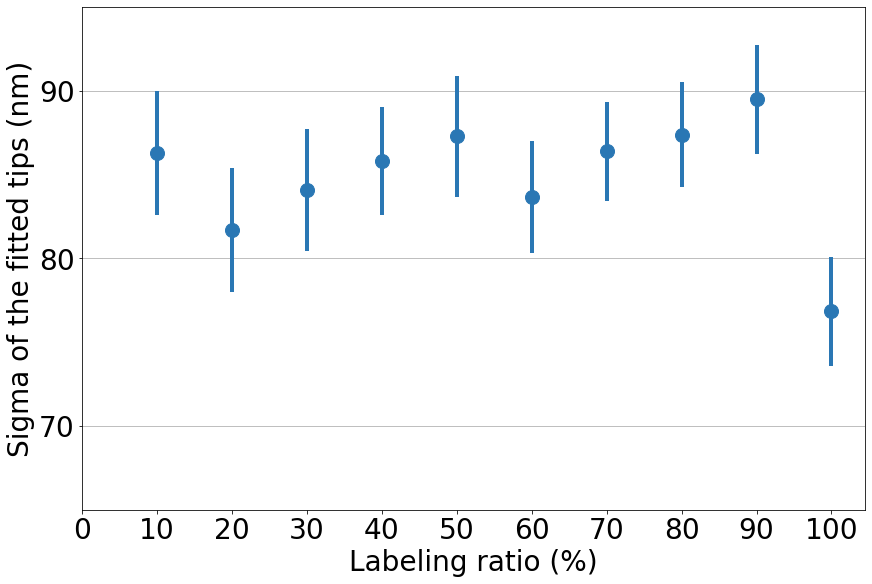

In [23]:
# Plot sigma of the fitted tips.

x_feature = 'parameter'
y_feature = 'sigma'

font_size = 28
color = "#2a77b4"

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

x = data[x_feature]
y = data[y_feature]

#ax.scatter(x, y, alpha=0.4, marker='x')

gb = data.groupby(x_feature)
average = gb.mean()

x_average = average.index * 100
y_average = average[y_feature]
ax.errorbar(x_average, y_average, yerr=gb.sem()[y_feature], fmt='o', color=color, elinewidth=4, markersize=14)

ax.set_xlabel("Labeling ratio (%)", fontsize=font_size)
ax.set_ylabel("Sigma of the fitted tips (nm)", fontsize=font_size)

ax.set_xticks(np.arange(0, 110, 10))
ax.set_yticks(np.arange(0, 110, 10))

ax.set_ylim(65, 95)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
ax.yaxis.grid()
    
fig.savefig(experiment_dir / "sigma.png")